In [19]:
from random import gauss as gs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import itertools


#statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima   
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
pd.plotting.register_matplotlib_converters()
import os, sys
# path_add = os.path.abspath(os.pardir)
# if path_add not in sys.path:
#     sys.path.append(path_add)

%matplotlib inline

In [20]:
zip_23226 = pd.read_csv('data/Zip_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon.csv')

In [21]:
zip_23226.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,1251067.0,1243911.0,1242393.0,1243116.0,1249957.0,1253918.0,1256918.0,1260189.0,1255048.0,1247237.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,360618.0,...,964280.0,964191.0,965875.0,968256.0,973015.0,978022.0,981918.0,985428.0,987405.0,991571.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,1533387.0,1534731.0,1533831.0,1534093.0,1534862.0,1541697.0,1549960.0,1557635.0,1558745.0,1558968.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,200194.0,...,337319.0,338148.0,338871.0,340299.0,341862.0,344329.0,347347.0,351632.0,355788.0,360651.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,547552.0,...,1204098.0,1205314.0,1208072.0,1211021.0,1216680.0,1222663.0,1228051.0,1233108.0,1236396.0,1243489.0


In [22]:
zip_23226 = zip_23226[zip_23226['RegionName'] == 23226]

In [23]:
zip_23226.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
6397,67601,6467,23226,Zip,VA,VA,Richmond,Richmond,Richmond City,128590.0,...,375875.0,377550.0,379551.0,381362.0,384055.0,386850.0,389781.0,393159.0,396384.0,400232.0


In [24]:
zip_23226 = zip_23226.iloc[:,9:].transpose()

In [25]:
zip_23226.head()

,6397
1996-01-31,128590.0
1996-02-29,128784.0
1996-03-31,128804.0
1996-04-30,128854.0
1996-05-31,128799.0


In [32]:
zip_23226.index = pd.to_datetime(zip_23226.index, infer_datetime_format=True)

In [33]:
zip_23226.index[0].month

1

In [34]:
zip_23226.rename(columns = {6397 : 'Zillow Home Value Index (ZHVI)'}, inplace = True )

In [35]:
zip_23226.head()

,Zillow Home Value Index (ZHVI)
1996-01-31,128590.0
1996-02-29,128784.0
1996-03-31,128804.0
1996-04-30,128854.0
1996-05-31,128799.0


In [30]:
zip_23226.index

DatetimeIndex(['1996-01-31', '1996-02-29', '1996-03-31', '1996-04-30',
               '1996-05-31', '1996-06-30', '1996-07-31', '1996-08-31',
               '1996-09-30', '1996-10-31',
               ...
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28'],
              dtype='datetime64[ns]', length=302, freq=None)

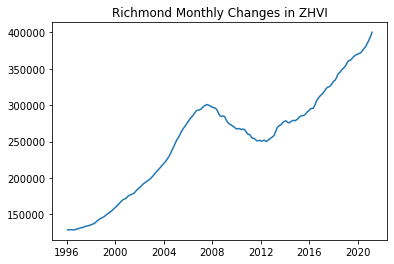

In [36]:
fig, ax = plt.subplots()
ax.plot(zip_23226)
ax.set_title("Richmond Monthly Changes in ZHVI");

In [356]:
#cutoff 20% of data
cutoff = round(zip_23226.shape[0]*0.9)
cutoff

272

In [127]:
zip_23226

,Zillow Home Value Index (ZHVI),Prior,ROI
1996-01-31,128590.0,NaN,NaN
1996-02-29,128784.0,128590.0,0.001509
1996-03-31,128804.0,128784.0,0.000155
1996-04-30,128854.0,128804.0,0.000388
1996-05-31,128799.0,128854.0,-0.000427
...,...,...,...
2020-10-31,386850.0,384055.0,0.007278
2020-11-30,389781.0,386850.0,0.007577
2020-12-31,393159.0,389781.0,0.008666
2021-01-31,396384.0,393159.0,0.008203


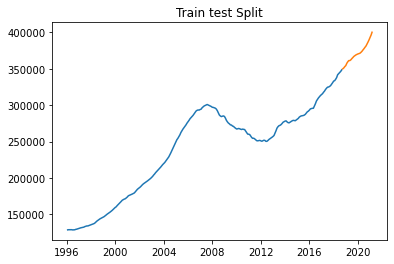

In [357]:
# Define train and test sets according to the index found above
trainz = zip_23226['Zillow Home Value Index (ZHVI)'][:cutoff]
testz = zip_23226['Zillow Home Value Index (ZHVI)'][cutoff:]

fig, ax = plt.subplots()
ax.plot(trainz)
ax.plot(testz)
ax.set_title('Train test Split');

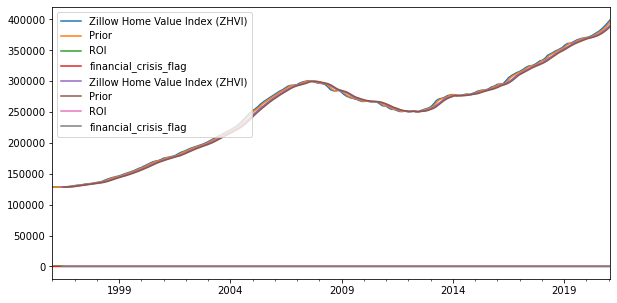

In [358]:
zip_23226_rolling = zip_23226.rolling(6).mean()

fig, ax = plt.subplots(figsize=(10, 5))

zip_23226.plot(ax=ax, label='raw')
zip_23226_rolling.plot(ax=ax, label='rolling average')

plt.legend();

<Figure size 432x288 with 0 Axes>

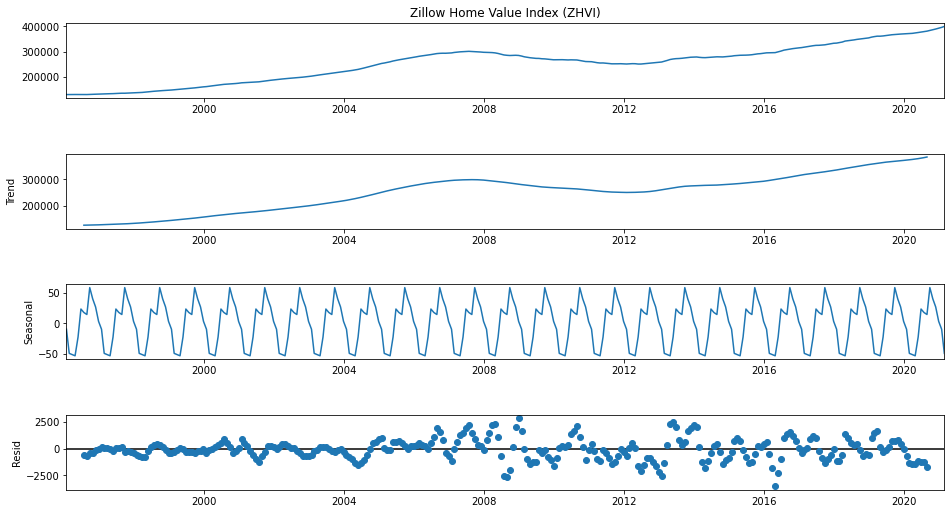

In [359]:
decomposition = seasonal_decompose(zip_23226['Zillow Home Value Index (ZHVI)'])
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.show()

In [41]:
def test_stationarity(timeseries, window):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries.iloc[window:], color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                             'p-value', '#Lags Used',
                                             'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print (dfoutput)

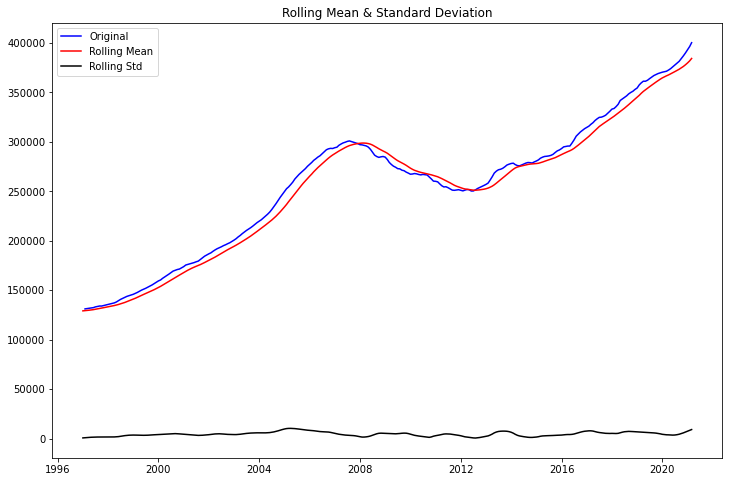

Results of Dickey-Fuller Test:
Test Statistic                  -0.271423
p-value                          0.929455
#Lags Used                      16.000000
Number of Observations Used    285.000000
Critical Value (1%)             -3.453505
Critical Value (5%)             -2.871735
Critical Value (10%)            -2.572202
dtype: float64


In [360]:
test_stationarity(zip_23226['Zillow Home Value Index (ZHVI)'], 12)

In [361]:
zip_23226_diff = zip_23226['Zillow Home Value Index (ZHVI)'].diff().dropna()

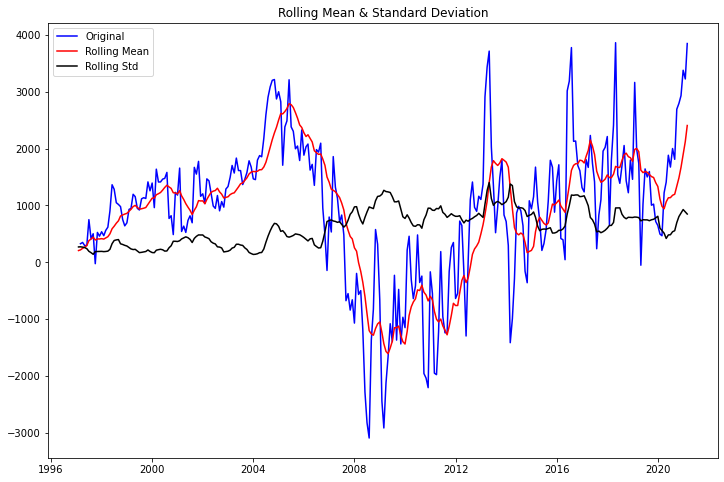

Results of Dickey-Fuller Test:
Test Statistic                  -1.709983
p-value                          0.425976
#Lags Used                      16.000000
Number of Observations Used    284.000000
Critical Value (1%)             -3.453587
Critical Value (5%)             -2.871771
Critical Value (10%)            -2.572222
dtype: float64


In [362]:
test_stationarity(zip_23226_diff, 12)

In [363]:
zip_23226_diff.head()

1996-02-29    194.0
1996-03-31     20.0
1996-04-30     50.0
1996-05-31    -55.0
1996-06-30   -286.0
Name: Zillow Home Value Index (ZHVI), dtype: float64

In [364]:
zip_23226_diff2 = zip_23226.diff().diff().dropna()

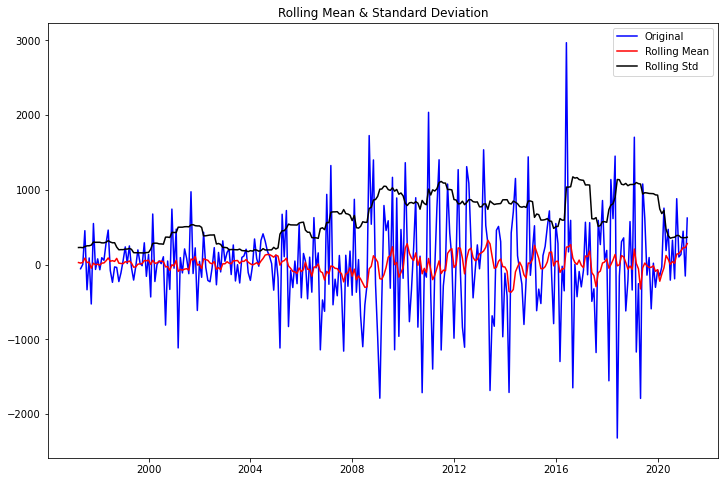

Results of Dickey-Fuller Test:
Test Statistic                  -5.479927
p-value                          0.000002
#Lags Used                      14.000000
Number of Observations Used    284.000000
Critical Value (1%)             -3.453587
Critical Value (5%)             -2.871771
Critical Value (10%)            -2.572222
dtype: float64


In [366]:
test_stationarity(zip_23226_diff2['Zillow Home Value Index (ZHVI)'], 12)

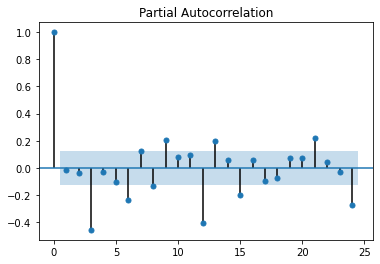

In [48]:
plot_pacf(trainz.diff().diff().dropna());

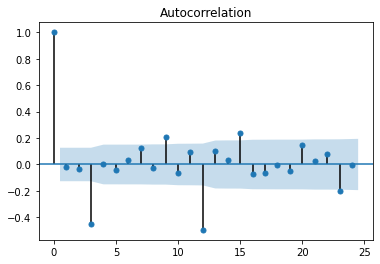

In [49]:
plot_acf(trainz.diff().diff().dropna());

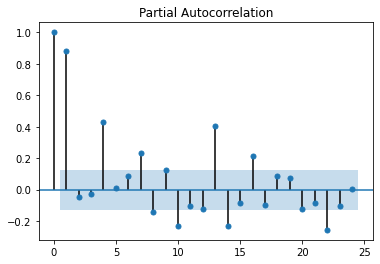

In [50]:
plot_pacf(trainz.diff().dropna());

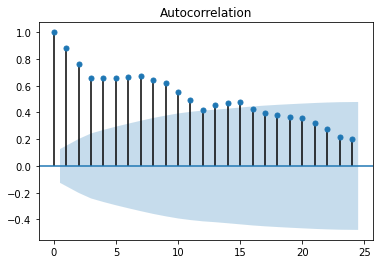

In [51]:
plot_acf(trainz.diff().dropna());

In [130]:
auto_arima(trainz, seasonal = True, m = 12)

ARIMA(order=(0, 2, 0), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [131]:
auto_arima(trainz, seasonal = True, m = 12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  242
Model:             SARIMAX(0, 2, 0)x(0, 0, [1], 12)   Log Likelihood               -1873.534
Date:                              Mon, 19 Apr 2021   AIC                           3751.067
Time:                                      14:34:58   BIC                           3758.028
Sample:                                           0   HQIC                          3753.872
                                              - 242                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.0403      0.009     -4.384      0.000      -0.058      -0.022
sigma2      3.436e+05   2.42e+04     14.213      0.000    2.96e+05    3.91e+05
===================================================================================
Ljung-Box (Q):                      175.63   Jarque-Bera (JB):                17.12
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.34   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [132]:
trainz

1996-01-31    128590.0
1996-02-29    128784.0
1996-03-31    128804.0
1996-04-30    128854.0
1996-05-31    128799.0
                ...   
2015-10-31    290864.0
2015-11-30    291745.0
2015-12-31    293176.0
2016-01-31    294891.0
2016-02-29    295309.0
Name: Zillow Home Value Index (ZHVI), Length: 242, dtype: float64

In [133]:
trainz.diff().diff().dropna()

1996-03-31    -174.0
1996-04-30      30.0
1996-05-31    -105.0
1996-06-30    -231.0
1996-07-31     368.0
               ...  
2015-10-31    -124.0
2015-11-30    -790.0
2015-12-31     550.0
2016-01-31     284.0
2016-02-29   -1297.0
Name: Zillow Home Value Index (ZHVI), Length: 240, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


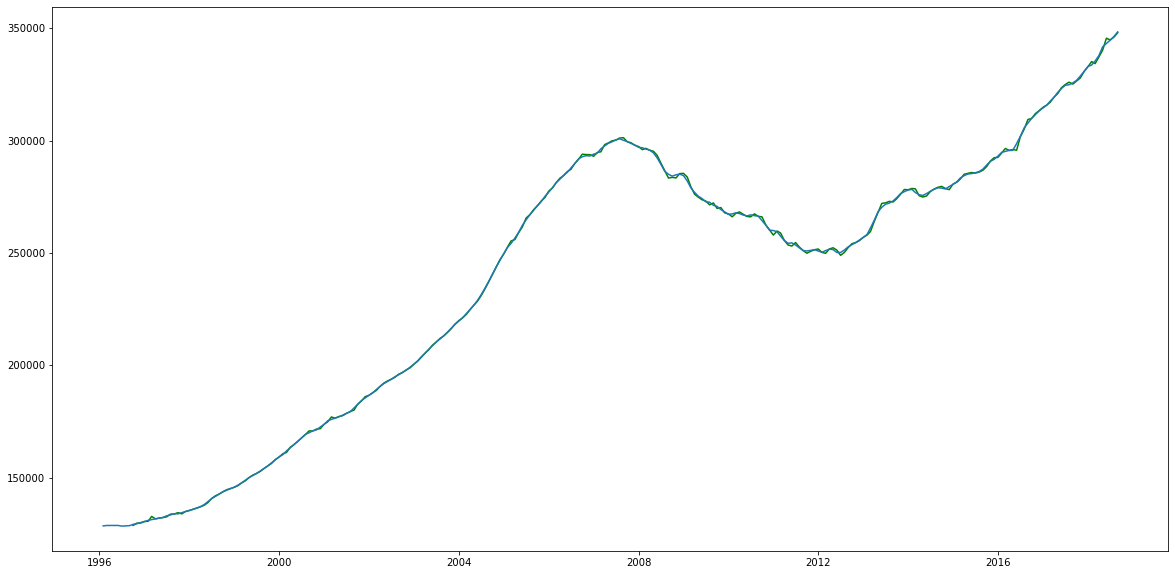

In [367]:
model = SARIMAX(trainz, order=(0, 2, 0), seasonal_order=(0,0,1,12), freq = 'M').fit()
y_hat_train = model.predict(start=trainz.index[8], end=trainz.index[-1],typ='levels')

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_hat_train, color = 'g')
ax.plot(trainz);

In [136]:
model.aic

3751.067163524937

In [368]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:       Zillow Home Value Index (ZHVI)   No. Observations:                  272
Model:             SARIMAX(0, 2, 0)x(0, 0, [1], 12)   Log Likelihood               -2131.207
Date:                              Mon, 19 Apr 2021   AIC                           4266.414
Time:                                      17:26:00   BIC                           4273.610
Sample:                                  01-31-1996   HQIC                          4269.304
                                       - 08-31-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.0417      0.009     -4.735      0.000      -0.059      -0.024
sigma2      3.605e+05   1.81e+04     19.950      0.000    3.25e+05    3.96e+05
===================================================================================
Ljung-Box (Q):                      166.86   Jarque-Bera (JB):                71.38
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               6.05   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
y_hat_train

1996-03-31    128978.000000
1996-04-30    129172.000000
1996-05-31    129366.000000
1996-06-30    129560.000000
1996-07-31    129754.000000
                  ...      
2015-10-31    359436.871023
2015-11-30    360453.780975
2015-12-31    361470.690926
2016-01-31    362487.600878
2016-02-29    363504.510830
Freq: M, Length: 240, dtype: float64

In [146]:
y_hat_test = model.predict(start=test.index[0], end=test.index[-1],typ='levels')

fig, ax = plt.subplots()
ax.plot(trainz, label='train')
ax.plot(testz, label='test')
ax.plot(y_hat_train, label='train_pred')
ax.plot(y_hat_test, label='test_pred')

plt.legend();

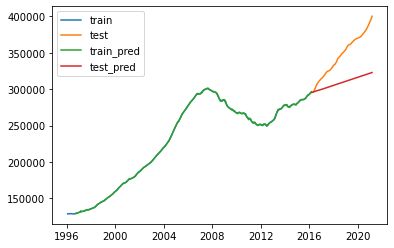

In [149]:
fig, ax = plt.subplots()
ax.plot(trainz, label='train')
ax.plot(testz, label='test')
ax.plot(y_hat_train, label='train_pred')
ax.plot(y_hat_test, label='test_pred')

plt.legend();

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


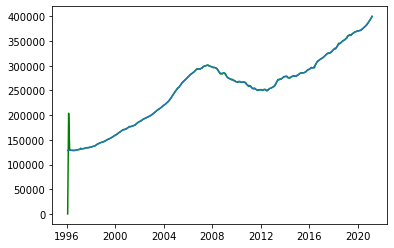

In [151]:
model2 = SARIMAX(zip_23226['Zillow Home Value Index (ZHVI)'], order=(0, 2, 0), seasonal_order=(0,0,1,12), freq = 'M').fit()
y_hat_train = model2.predict(typ='levels')

fig, ax = plt.subplots()
ax.plot(y_hat_train, color = 'g')
ax.plot(zip_23226['Zillow Home Value Index (ZHVI)']);

In [152]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:       Zillow Home Value Index (ZHVI)   No. Observations:                  302
Model:             SARIMAX(0, 2, 0)x(0, 0, [1], 12)   Log Likelihood               -2366.315
Date:                              Mon, 19 Apr 2021   AIC                           4736.630
Time:                                      14:47:52   BIC                           4744.037
Sample:                                  01-31-1996   HQIC                          4739.594
                                       - 02-28-2021                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.0444      0.008     -5.419      0.000      -0.060      -0.028
sigma2      4.045e+05    2.2e+04     18.371      0.000    3.61e+05    4.48e+05
===================================================================================
Ljung-Box (Q):                      191.14   Jarque-Bera (JB):                71.70
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.44   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [156]:
forecast = model2.forecast(steps = 24)

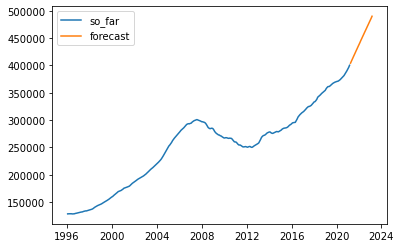

In [157]:
fig, ax = plt.subplots()

ax.plot(zip_23226['Zillow Home Value Index (ZHVI)'], label='so_far')
ax.plot(forecast, label='forecast')
# ax.set_title('Chicago Gun Crime Predictions\n One Year out')

plt.legend();

#### Predicting Monthly Price Appreciation

In [60]:
zip_23226.head()

,Zillow Home Value Index (ZHVI)
1996-01-31,128590.0
1996-02-29,128784.0
1996-03-31,128804.0
1996-04-30,128854.0
1996-05-31,128799.0


In [61]:
zip_23226.shift(1)

,Zillow Home Value Index (ZHVI)
1996-01-31,NaN
1996-02-29,128590.0
1996-03-31,128784.0
1996-04-30,128804.0
1996-05-31,128854.0
...,...
2020-10-31,384055.0
2020-11-30,386850.0
2020-12-31,389781.0
2021-01-31,393159.0


In [62]:
zip_23226['Prior'] = zip_23226.shift(1)

In [63]:
zip_23226

,Zillow Home Value Index (ZHVI),Prior
1996-01-31,128590.0,NaN
1996-02-29,128784.0,128590.0
1996-03-31,128804.0,128784.0
1996-04-30,128854.0,128804.0
1996-05-31,128799.0,128854.0
...,...,...
2020-10-31,386850.0,384055.0
2020-11-30,389781.0,386850.0
2020-12-31,393159.0,389781.0
2021-01-31,396384.0,393159.0


In [64]:
zip_23226['ROI'] =   (zip_23226['Zillow Home Value Index (ZHVI)'] - zip_23226['Prior']) / zip_23226['Prior']

In [65]:
zip_23226.head()

,Zillow Home Value Index (ZHVI),Prior,ROI
1996-01-31,128590.0,NaN,NaN
1996-02-29,128784.0,128590.0,0.001509
1996-03-31,128804.0,128784.0,0.000155
1996-04-30,128854.0,128804.0,0.000388
1996-05-31,128799.0,128854.0,-0.000427


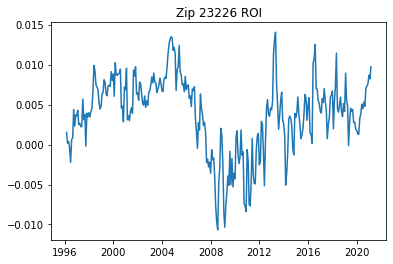

In [66]:
fig, ax = plt.subplots()
ax.plot(zip_23226['ROI'])
ax.set_title("Zip 23226 ROI");

<Figure size 432x288 with 0 Axes>

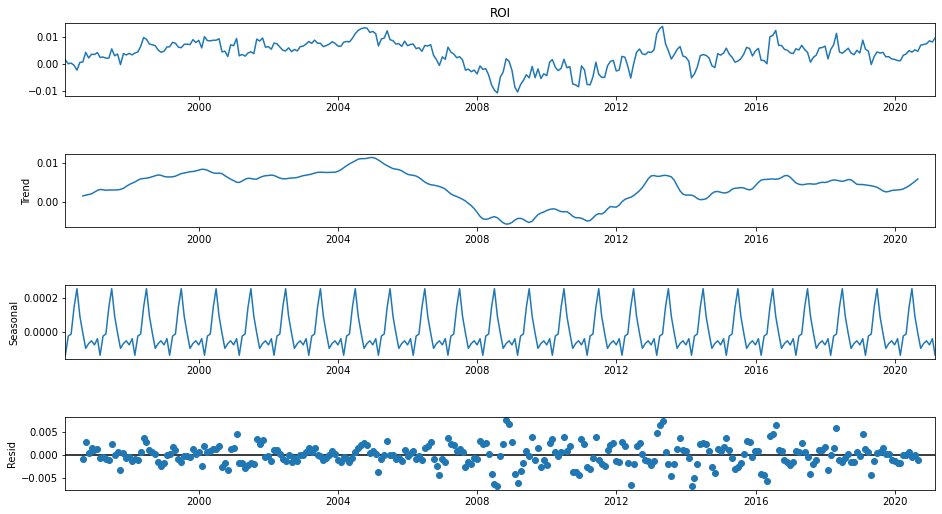

In [158]:
decomposition = seasonal_decompose(zip_23226['ROI'].dropna())
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.show()

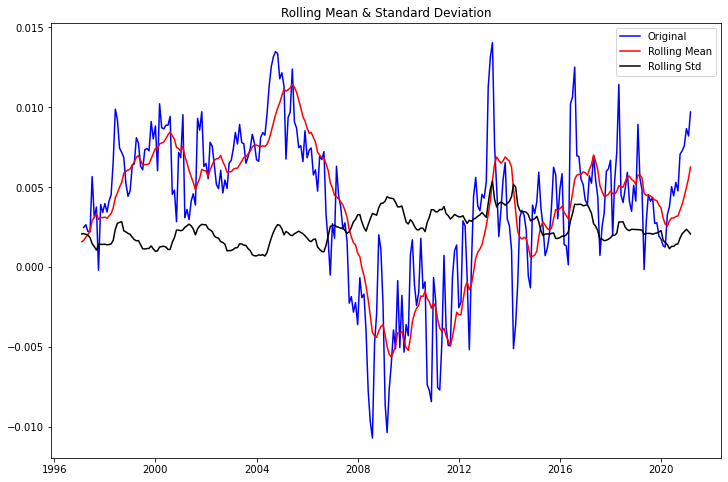

Results of Dickey-Fuller Test:
Test Statistic                  -1.827378
p-value                          0.366957
#Lags Used                      16.000000
Number of Observations Used    284.000000
Critical Value (1%)             -3.453587
Critical Value (5%)             -2.871771
Critical Value (10%)            -2.572222
dtype: float64


In [159]:
test_stationarity(zip_23226['ROI'].dropna(), 12)

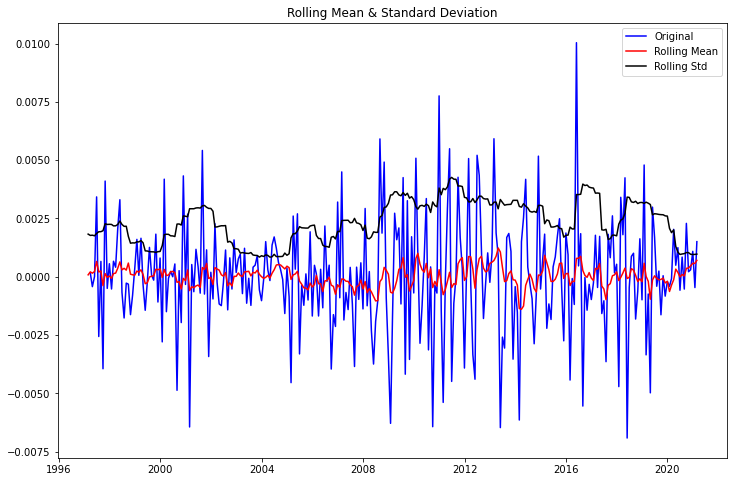

Results of Dickey-Fuller Test:
Test Statistic                  -5.028419
p-value                          0.000019
#Lags Used                      15.000000
Number of Observations Used    284.000000
Critical Value (1%)             -3.453587
Critical Value (5%)             -2.871771
Critical Value (10%)            -2.572222
dtype: float64


In [69]:
test_stationarity(zip_23226['ROI'].diff().dropna(), 12)

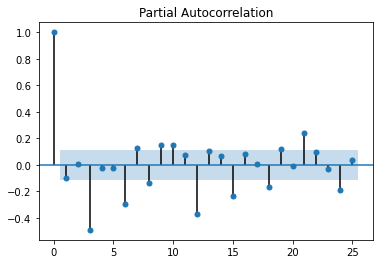

In [70]:
plot_pacf(zip_23226['ROI'].diff().dropna());

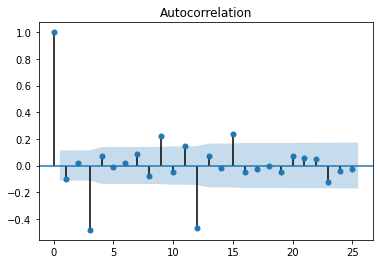

In [71]:
plot_acf(zip_23226['ROI'].diff().dropna());

In [218]:
zip_23226[1:cutoff]

,Zillow Home Value Index (ZHVI),Prior,ROI,financial_crisis_flag
1996-02-29,128784.0,128590.0,0.001509,0
1996-03-31,128804.0,128784.0,0.000155,0
1996-04-30,128854.0,128804.0,0.000388,0
1996-05-31,128799.0,128854.0,-0.000427,0
1996-06-30,128513.0,128799.0,-0.002221,0
...,...,...,...,...
2015-10-31,290864.0,289193.0,0.005778,0
2015-11-30,291745.0,290864.0,0.003029,0
2015-12-31,293176.0,291745.0,0.004905,0
2016-01-31,294891.0,293176.0,0.005850,0


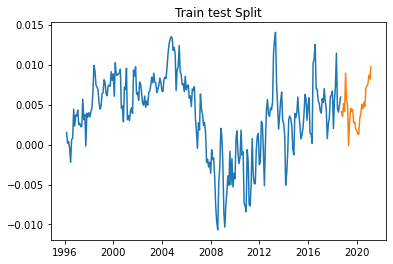

In [378]:
# Define train and test sets according to the index found above
train = zip_23226['ROI'][:cutoff].dropna()
exog = zip_23226['financial_crisis_flag'][1:cutoff]
test = zip_23226['ROI'][cutoff:]

fig, ax = plt.subplots()
ax.plot(train)
ax.plot(test)
ax.set_title('Train test Split');

In [160]:
auto_arima(train, seasonal = True, m = 12)

auto_arima(train, seasonal = True, m = 12).summary()

/opt/anaconda3/lib/python3.8/site-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(1,1,0)(0,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "statsmodels/tsa/statespace/_filters/_inversions.pyx", line 411, in statsmodels.tsa.statespace._filters._inversions.dinverse_univariate
ZeroDivisionError: float division

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/pmdarima/arima/arima.py", line 482, in fit
    self._fit(y, X, **fit_args)
  File "/opt/anaconda3/lib/python3.8/site-packages/pmdarima/arima/arima.py", line 403, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/opt/anaconda3/lib/python3

/opt/anaconda3/lib/python3.8/site-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(1,1,0)(0,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "statsmodels/tsa/statespace/_filters/_inversions.pyx", line 411, in statsmodels.tsa.statespace._filters._inversions.dinverse_univariate
ZeroDivisionError: float division

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/pmdarima/arima/arima.py", line 482, in fit
    self._fit(y, X, **fit_args)
  File "/opt/anaconda3/lib/python3.8/site-packages/pmdarima/arima/arima.py", line 403, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/opt/anaconda3/lib/python3

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  241
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 12)   Log Likelihood                1181.610
Date:                              Mon, 19 Apr 2021   AIC                          -2359.220
Time:                                      14:57:27   BIC                          -2352.259
Sample:                                           0   HQIC                         -2356.416
                                              - 241                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.8553      0.065    -13.239      0.000      -0.982      -0.729
sigma2      2.894e-06   2.59e-07     11.174      0.000    2.39e-06     3.4e-06
===================================================================================
Ljung-Box (Q):                      119.26   Jarque-Bera (JB):                29.82
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.23   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [161]:
auto_arima(train)

auto_arima(train).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  241
Model:               SARIMAX(0, 1, 0)   Log Likelihood                1107.257
Date:                Mon, 19 Apr 2021   AIC                          -2212.515
Time:                        14:57:28   BIC                          -2209.034
Sample:                             0   HQIC                         -2211.113
                                - 241                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.733e-06   4.45e-07     12.872      0.000    4.86e-06    6.61e-06
===================================================================================
Ljung-Box (Q):                      198.91   Jarque-Bera (JB):                 5.58
Prob(Q):                              0.00   Prob(JB):                         0.06
Heteroskedasticity (H):               2.39   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
train

1996-02-29    0.001509
1996-03-31    0.000155
1996-04-30    0.000388
1996-05-31   -0.000427
1996-06-30   -0.002221
                ...   
2015-10-31    0.005778
2015-11-30    0.003029
2015-12-31    0.004905
2016-01-31    0.005850
2016-02-29    0.001417
Name: ROI, Length: 241, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


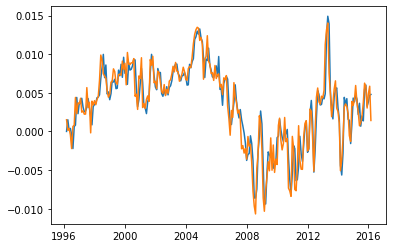

In [172]:
model = SARIMAX(train.dropna(), order=(0, 1, 0), seasonal_order=(0, 0, 1, 12), freq = 'M').fit()
y_hat_train = model.predict(typ='levels')

fig, ax = plt.subplots()
ax.plot(y_hat_train)
ax.plot(train);

In [173]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                  ROI   No. Observations:                  241
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 12)   Log Likelihood                1181.610
Date:                              Mon, 19 Apr 2021   AIC                          -2359.220
Time:                                      15:03:26   BIC                          -2352.259
Sample:                                  02-29-1996   HQIC                         -2356.416
                                       - 02-29-2016                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.8553      0.065    -13.239      0.000      -0.982      -0.729
sigma2      2.894e-06   2.59e-07     11.174      0.000    2.39e-06     3.4e-06
===================================================================================
Ljung-Box (Q):                      119.26   Jarque-Bera (JB):                29.82
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.23   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

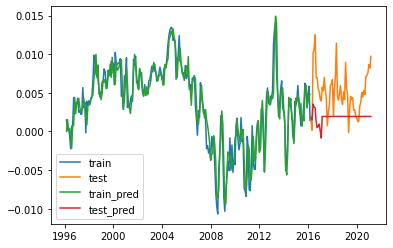

In [194]:
y_hat_test = model.predict(start=test.index[0], end=test.index[-1],typ='levels', dynamic = True)

fig, ax = plt.subplots()
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.plot(y_hat_train, label='train_pred')
ax.plot(y_hat_test, label='test_pred')

plt.legend();

In [180]:
model = SARIMAX(zip_23226['ROI'].dropna(), order=(0, 1, 0), seasonal_order=(0, 0, 1, 12), freq = 'M').fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [190]:
forecast = model.forecast(steps=60)

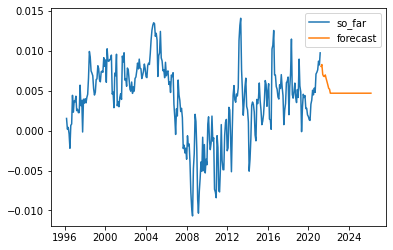

In [191]:
fig, ax = plt.subplots()

ax.plot(zip_23226['ROI'], label='so_far')
ax.plot(forecast, label='forecast')
# ax.set_title('Chicago Gun Crime Predictions\n One Year out')

plt.legend();

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


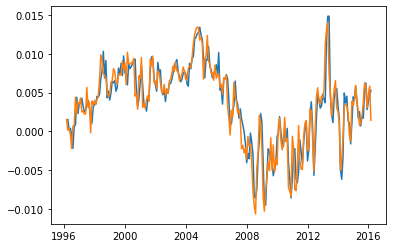

In [195]:
model2 = SARIMAX(train.dropna(), order=(0, 1, 0), seasonal_order = (1,0,1,12), freq = 'M').fit()
y_hat_train = model2.predict(start=train.index[1], end=train.index[-1],typ='levels')

fig, ax = plt.subplots()
ax.plot(y_hat_train)
ax.plot(train);

In [196]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                  ROI   No. Observations:                  241
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                1170.987
Date:                              Mon, 19 Apr 2021   AIC                          -2335.973
Time:                                      15:36:08   BIC                          -2325.531
Sample:                                  02-29-1996   HQIC                         -2331.766
                                       - 02-29-2016                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.2605      0.090     -2.890      0.004      -0.437      -0.084
ma.S.L12      -0.5878      0.097     -6.071      0.000      -0.778      -0.398
sigma2      3.239e-06   3.26e-07      9.951      0.000     2.6e-06    3.88e-06
===================================================================================
Ljung-Box (Q):                      155.69   Jarque-Bera (JB):                62.02
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.38   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

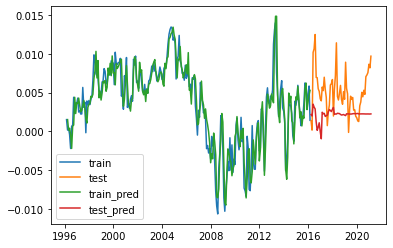

In [197]:
y_hat_test = model2.predict(start=test.index[0], end=test.index[-1],typ='levels', dynamic = True)

fig, ax = plt.subplots()
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.plot(y_hat_train, label='train_pred')
ax.plot(y_hat_test, label='test_pred')

plt.legend();

In [201]:
model2 = SARIMAX(zip_23226['ROI'].dropna(), order=(0, 1, 0), seasonal_order=(1, 0, 1, 12), freq = 'M').fit()
forecast = model2.forecast(steps=60)

fig, ax = plt.subplots()

ax.plot(zip_23226['ROI'], label='so_far')
ax.plot(forecast, label='forecast')
# ax.set_title('Chicago Gun Crime Predictions\n One Year out')

plt.legend();

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


### Add Exogenous Variable for Financial Crisis

In [203]:
zip_23226.head()

,Zillow Home Value Index (ZHVI),Prior,ROI
1996-01-31,128590.0,NaN,NaN
1996-02-29,128784.0,128590.0,0.001509
1996-03-31,128804.0,128784.0,0.000155
1996-04-30,128854.0,128804.0,0.000388
1996-05-31,128799.0,128854.0,-0.000427


In [209]:
zip_23226.loc['2007-07-31': '2010-7-31']

,Zillow Home Value Index (ZHVI),Prior,ROI
2007-07-31,300905.0,300423.0,0.001604
2007-08-31,300229.0,300905.0,-0.002247
2007-09-30,299678.0,300229.0,-0.001835
2007-10-31,298837.0,299678.0,-0.002806
2007-11-30,298177.0,298837.0,-0.002209
2007-12-31,297107.0,298177.0,-0.003588
2008-01-31,296911.0,297107.0,-0.000660
2008-02-29,296345.0,296911.0,-0.001906
2008-03-31,295846.0,296345.0,-0.001684
2008-04-30,294663.0,295846.0,-0.003999


In [211]:
zip_23226['financial_crisis_flag'] = 0

In [329]:
zip_23226.loc['2007-08-30': '2012-01-31', 'financial_crisis_flag'] = 1

In [101]:
zip_23226.iloc[162]

Zillow Home Value Index (ZHVI)    272655.000000
Prior                             272884.000000
ROI                                   -0.000839
Name: 2009-07-31 00:00:00, dtype: float64

In [231]:
train

1996-02-29    0.001509
1996-03-31    0.000155
1996-04-30    0.000388
1996-05-31   -0.000427
1996-06-30   -0.002221
                ...   
2015-10-31    0.005778
2015-11-30    0.003029
2015-12-31    0.004905
2016-01-31    0.005850
2016-02-29    0.001417
Name: ROI, Length: 241, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


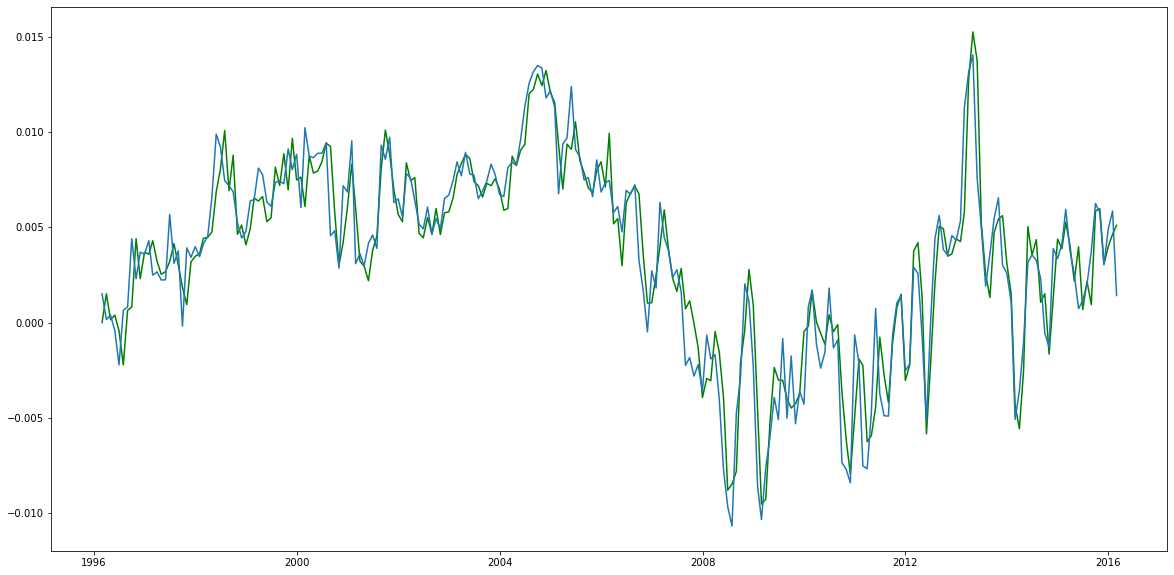

In [369]:
model3 = SARIMAX(endog = train, exog = exog, order=(0, 1, 0), seasonal_order=(1, 0, 1, 12), freq = 'M').fit()

y_hat_train = model3.predict(typ='levels')

fig, ax = plt.subplots(figsize = (20,10))
ax.plot(y_hat_train, color = 'g')
ax.plot(train);

In [370]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                  ROI   No. Observations:                  241
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                1186.010
Date:                              Mon, 19 Apr 2021   AIC                          -2364.019
Time:                                      17:27:01   BIC                          -2350.097
Sample:                                  02-29-1996   HQIC                         -2358.410
                                       - 02-29-2016                                         
Covariance Type:                                opg                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
financial_crisis_flag    -0.0008      0.000     -2.071      0.038      -0.002   -4.16e-05
ar.S.L12                 -0.0733      0.075     -0.978      0.328      -0.220       0.074
ma.S.L12                 -0.9117      0.078    -11.671      0.000      -1.065      -0.759
sigma2                 2.701e-06   2.54e-07     10.620      0.000     2.2e-06     3.2e-06
===================================================================================
Ljung-Box (Q):                      114.81   Jarque-Bera (JB):                21.62
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.19   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

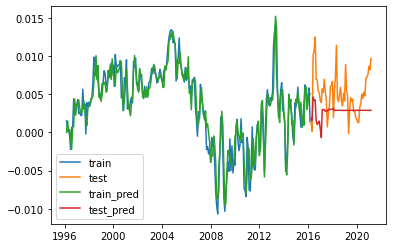

In [373]:
y_hat_test = model3.predict(start=test.index[0], end=test.index[-1],typ='levels', exog = np.zeros(len(test)), dynamic = True)

fig, ax = plt.subplots()
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.plot(y_hat_train, label='train_pred')
ax.plot(y_hat_test, label='test_pred')

plt.legend();

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


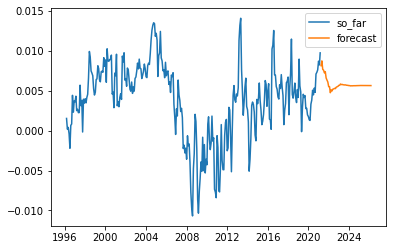

In [374]:
model2 = SARIMAX(zip_23226['ROI'].dropna(), order=(0, 1, 0), seasonal_order=(1, 0, 1, 12), freq = 'M').fit()
forecast = model2.forecast(steps=60)

fig, ax = plt.subplots()

ax.plot(zip_23226['ROI'], label='so_far')
ax.plot(forecast, label='forecast')
# ax.set_title('Chicago Gun Crime Predictions\n One Year out')

plt.legend();

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


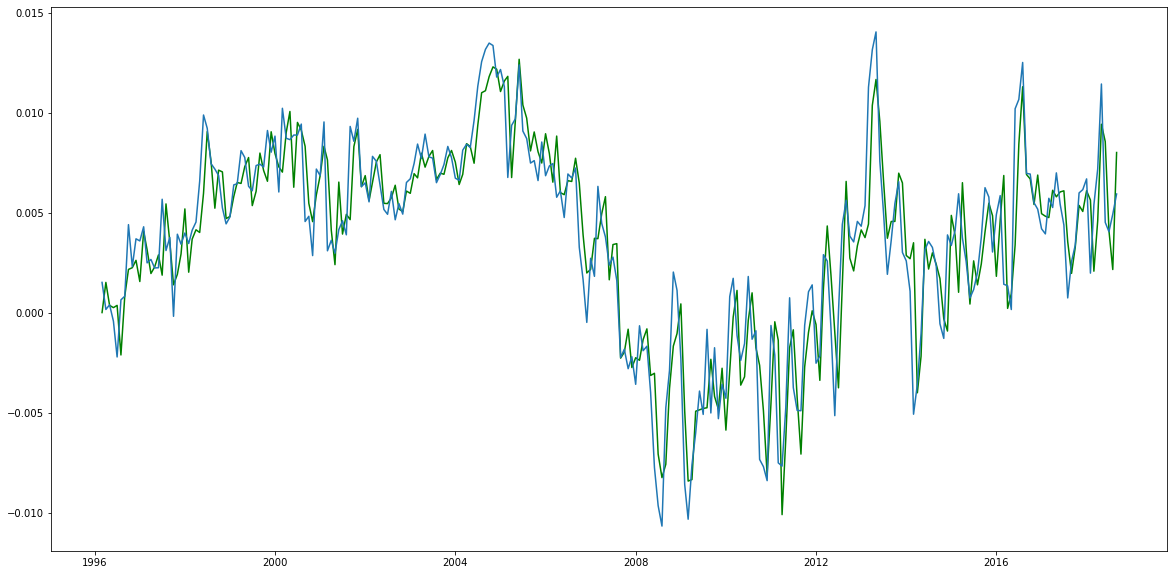

In [379]:
model5 = SARIMAX(endog = train, exog = exog, order=(3, 1, 3), freq = 'M').fit()

y_hat_train = model5.predict(typ='levels')

fig, ax = plt.subplots(figsize = (20,10))
ax.plot(y_hat_train, color = 'g')
ax.plot(train);

In [380]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    ROI   No. Observations:                  271
Model:               SARIMAX(3, 1, 3)   Log Likelihood                1290.210
Date:                Mon, 19 Apr 2021   AIC                          -2564.420
Time:                        17:29:52   BIC                          -2535.633
Sample:                    02-29-1996   HQIC                         -2552.860
                         - 08-31-2018                                         
Covariance Type:                  opg                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
financial_crisis_flag    -0.0042      0.001     -3.328      0.001      -0.007      -0.002
ar.L1                    -0.1321      0.123     -1.072      0.284      -0.373       0.109
ar.L2                     0.1079      0.097      1.113      0.266      -0.082       0.298
ar.L3                    -0.2262      0.105     -2.151      0.031      -0.432      -0.020
ma.L1                     0.0023      0.125      0.018      0.985      -0.242       0.247
ma.L2                    -0.1449      0.100     -1.449      0.147      -0.341       0.051
ma.L3                    -0.4136      0.103     -4.031      0.000      -0.615      -0.212
sigma2                 4.099e-06   2.79e-07     14.711      0.000    3.55e-06    4.65e-06
===================================================================================
Ljung-Box (Q):                       94.23   Jarque-Bera (JB):                32.52
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.52   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

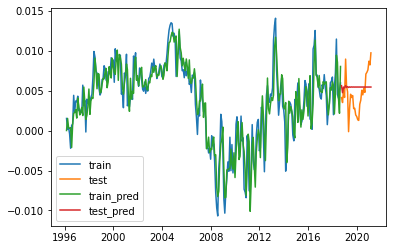

In [384]:
y_hat_test = model5.predict(start=test.index[0], end=test.index[-1],typ='levels', exog = np.zeros(len(test)), dynamic = False)

fig, ax = plt.subplots()
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.plot(y_hat_train, label='train_pred')
ax.plot(y_hat_test, label='test_pred')

plt.legend();

In [385]:
y_hat_test

2018-09-30    0.005614
2018-10-31    0.004723
2018-11-30    0.005437
2018-12-31    0.005318
2019-01-31    0.005612
                ...   
2020-10-31    0.005435
2020-11-30    0.005436
2020-12-31    0.005435
2021-01-31    0.005436
2021-02-28    0.005435
Freq: M, Length: 30, dtype: float64

In [265]:
zip_23226['ROI'].dropna()

1996-02-29    0.001509
1996-03-31    0.000155
1996-04-30    0.000388
1996-05-31   -0.000427
1996-06-30   -0.002221
                ...   
2020-10-31    0.007278
2020-11-30    0.007577
2020-12-31    0.008666
2021-01-31    0.008203
2021-02-28    0.009708
Name: ROI, Length: 301, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


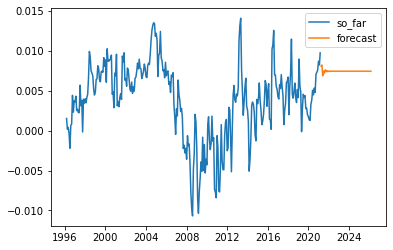

In [386]:
model5 = SARIMAX(zip_23226['ROI'].dropna(), order=(3, 1, 3), exog = zip_23226.loc['1996-02-29':,'financial_crisis_flag'], freq = 'M').fit()
forecast = model5.forecast(steps=60, exog = np.zeros(60))

fig, ax = plt.subplots()

ax.plot(zip_23226['ROI'], label='so_far')
ax.plot(forecast, label='forecast')
# ax.set_title('Chicago Gun Crime Predictions\n One Year out')

plt.legend();

In [387]:
forecast

2021-03-31    0.008051
2021-04-30    0.008192
2021-05-31    0.006846
2021-06-30    0.007435
2021-07-31    0.007169
                ...   
2025-10-31    0.007413
2025-11-30    0.007413
2025-12-31    0.007413
2026-01-31    0.007413
2026-02-28    0.007413
Freq: M, Length: 60, dtype: float64

In [348]:
zip_23226['ROI'].rolling(6).mean()

1996-01-31         NaN
1996-02-29         NaN
1996-03-31         NaN
1996-04-30         NaN
1996-05-31         NaN
                ...   
2020-10-31    0.005650
2020-11-30    0.006074
2020-12-31    0.006776
2021-01-31    0.007259
2021-02-28    0.008082
Name: ROI, Length: 302, dtype: float64

In [347]:
zip_23226['ROI'].mean()

0.003790269994768426

In [ ]:
model6 = SARIMAX(endog = train, exog = exog, order=(0, 1, 0), seasonal_order=(1, 0, 1, 12), freq = 'M').fit()

y_hat_train = model3.predict(typ='levels')

fig, ax = plt.subplots(figsize = (20,10))
ax.plot(y_hat_train, color = 'g')
ax.plot(train);

In [240]:
train2 = zip_23226['ROI'].iloc[:144].dropna()
exog2 = zip_23226['financial_crisis_flag'].iloc[1:144]
test2 = zip_23226['ROI'].iloc[162:].dropna()

<Figure size 432x288 with 0 Axes>

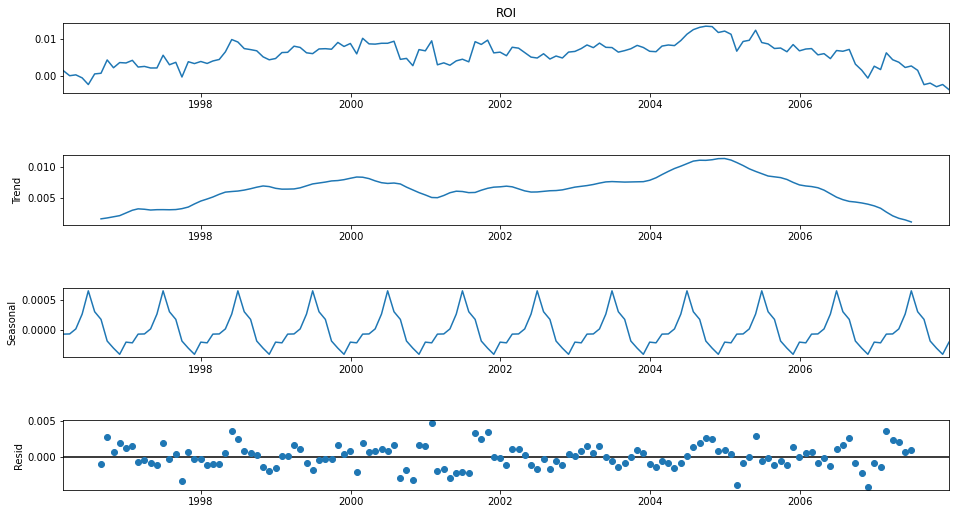

In [106]:
decomposition = seasonal_decompose(train2)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.show()

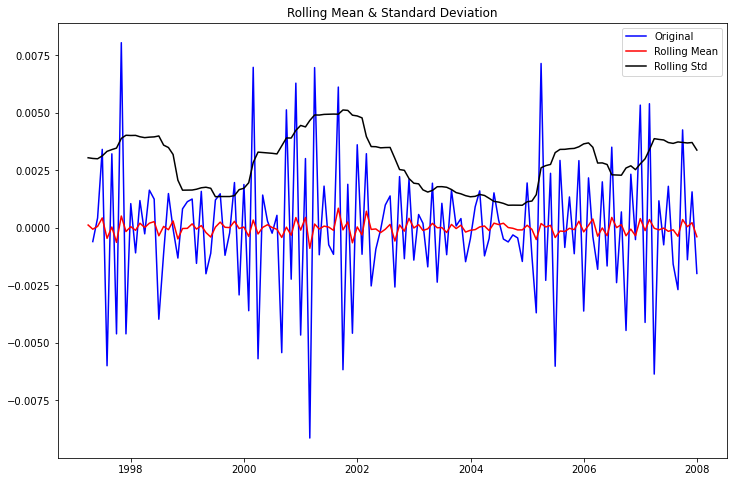

Results of Dickey-Fuller Test:
Test Statistic                -6.636676e+00
p-value                        5.540272e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


In [236]:
test_stationarity(train2.diff().diff().dropna(), 12)

In [237]:
auto_arima(train2)

auto_arima(train2).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(1, 1, 3)   Log Likelihood                 718.757
Date:                Mon, 19 Apr 2021   AIC                          -1425.514
Time:                        16:06:45   BIC                          -1407.779
Sample:                             0   HQIC                         -1418.307
                                - 143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.231e-05      0.000     -0.260      0.795      -0.000       0.000
ar.L1         -0.5474      0.174     -3.144      0.002      -0.889      -0.206
ma.L1          0.3102      0.166      1.865      0.062      -0.016       0.636
ma.L2          0.0580      0.104      0.557      0.577      -0.146       0.262
ma.L3         -0.4208      0.103     -4.103      0.000      -0.622      -0.220
sigma2      2.319e-06   2.29e-07     10.119      0.000    1.87e-06    2.77e-06
===================================================================================
Ljung-Box (Q):                       50.27   Jarque-Bera (JB):                11.25
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                            -0.20
Prob(H) (two-sided):                  0.36   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [238]:
auto_arima(train2, seasonal = True, m =12)

auto_arima(train2, seasonal = True, m = 12).summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1893: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1893: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  143
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 12)   Log Likelihood                 724.873
Date:                              Mon, 19 Apr 2021   AIC                          -1445.745
Time:                                      16:07:25   BIC                          -1439.834
Sample:                                           0   HQIC                         -1443.343
                                              - 143                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.7223      0.096     -7.508      0.000      -0.911      -0.534
sigma2      2.025e-06    2.3e-07      8.794      0.000    1.57e-06    2.48e-06
===================================================================================
Ljung-Box (Q):                       80.45   Jarque-Bera (JB):                 7.02
Prob(Q):                              0.00   Prob(JB):                         0.03
Heteroskedasticity (H):               1.35   Skew:                            -0.21
Prob(H) (two-sided):                  0.30   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

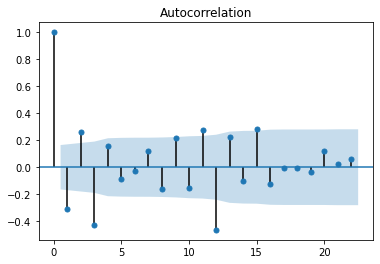

In [113]:
plot_acf(train2.diff().dropna());

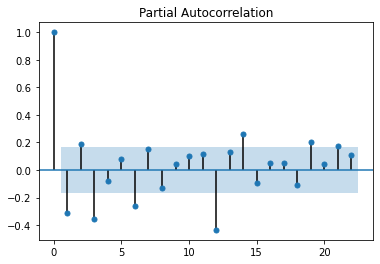

In [114]:
plot_pacf(train2.diff().dropna());

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


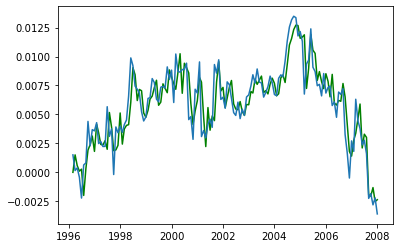

In [251]:
model4 = SARIMAX(endog = train2, exog = exog2, order=(3, 1, 3), freq = 'M').fit()
y_hat_train = model4.predict(typ='levels')

fig, ax = plt.subplots()
ax.plot(y_hat_train, color = 'g')
ax.plot(train2);

In [252]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    ROI   No. Observations:                  143
Model:               SARIMAX(3, 1, 3)   Log Likelihood                 720.241
Date:                Mon, 19 Apr 2021   AIC                          -1424.483
Time:                        16:13:32   BIC                          -1400.836
Sample:                    02-29-1996   HQIC                         -1414.874
                         - 12-31-2007                                         
Covariance Type:                  opg                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
financial_crisis_flag    -0.0039      0.007     -0.577      0.564      -0.017       0.009
ar.L1                    -0.3622      0.271     -1.338      0.181      -0.893       0.168
ar.L2                     0.2322      0.224      1.037      0.300      -0.207       0.671
ar.L3                    -0.0008      0.200     -0.004      0.997      -0.392       0.391
ma.L1                     0.1577      0.253      0.623      0.534      -0.339       0.654
ma.L2                    -0.2180      0.197     -1.109      0.267      -0.603       0.167
ma.L3                    -0.4035      0.137     -2.947      0.003      -0.672      -0.135
sigma2                 2.287e-06   2.25e-07     10.187      0.000    1.85e-06    2.73e-06
===================================================================================
Ljung-Box (Q):                       56.26   Jarque-Bera (JB):                12.08
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                            -0.14
Prob(H) (two-sided):                  0.58   Kurtosis:                         4.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [245]:
train2

1996-02-29    0.001509
1996-03-31    0.000155
1996-04-30    0.000388
1996-05-31   -0.000427
1996-06-30   -0.002221
                ...   
2007-08-31   -0.002247
2007-09-30   -0.001835
2007-10-31   -0.002806
2007-11-30   -0.002209
2007-12-31   -0.003588
Name: ROI, Length: 143, dtype: float64

In [255]:
test2

2009-07-31   -0.000839
2009-08-31   -0.005021
2009-09-30   -0.001758
2009-10-31   -0.005306
2009-11-30   -0.003590
                ...   
2020-10-31    0.007278
2020-11-30    0.007577
2020-12-31    0.008666
2021-01-31    0.008203
2021-02-28    0.009708
Name: ROI, Length: 140, dtype: float64

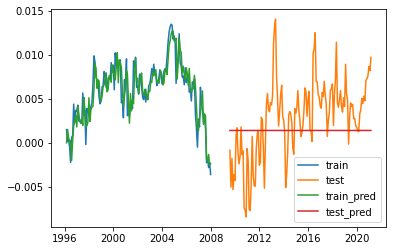

In [258]:
y_hat_test = model4.predict(start=test2.index[0], end=test2.index[-1],typ='levels', exog = np.zeros(158), dynamic = False)

fig, ax = plt.subplots()
ax.plot(train2, label='train')
ax.plot(test2, label='test')
ax.plot(y_hat_train, label='train_pred')
ax.plot(y_hat_test, label='test_pred')

plt.legend();

In [268]:
trainz2 = zip_23226['Zillow Home Value Index (ZHVI)'].iloc[:140].dropna()
exog2 = zip_23226['financial_crisis_flag'].iloc[1:140]
testz2 = zip_23226['ROI'].iloc[162:].dropna()

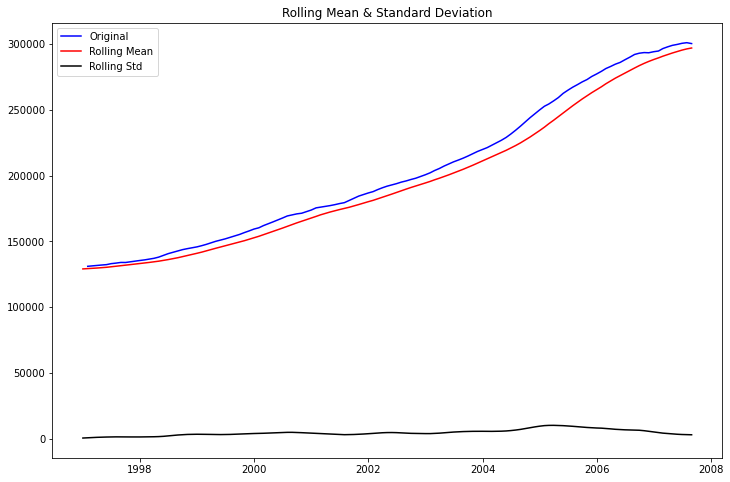

Results of Dickey-Fuller Test:
Test Statistic                  -2.173541
p-value                          0.215988
#Lags Used                      13.000000
Number of Observations Used    126.000000
Critical Value (1%)             -3.483346
Critical Value (5%)             -2.884766
Critical Value (10%)            -2.579156
dtype: float64


In [271]:
test_stationarity(trainz2.dropna(), 12)

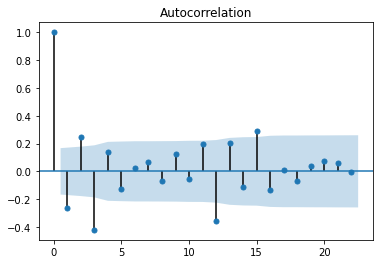

In [274]:
plot_acf(trainz2.diff().diff().dropna());

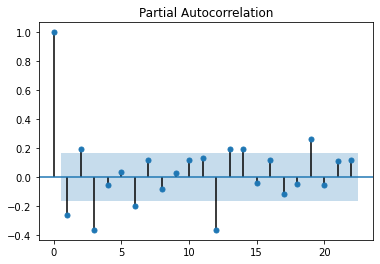

In [275]:
plot_pacf(trainz2.diff().diff().dropna());

In [276]:
auto_arima(trainz2)

auto_arima(trainz2).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  140
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1015.644
Date:                Mon, 19 Apr 2021   AIC                           2033.287
Time:                        16:31:43   BIC                           2036.214
Sample:                             0   HQIC                          2034.477
                                - 140                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.446e+05   1.21e+04     11.910      0.000    1.21e+05    1.68e+05
===================================================================================
Ljung-Box (Q):                      113.03   Jarque-Bera (JB):                25.98
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.09   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


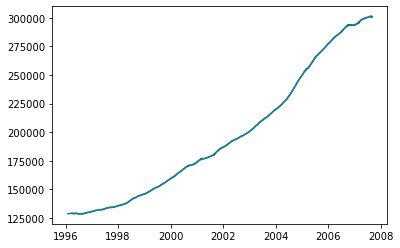

In [389]:
model6 = SARIMAX(endog = trainz2, order=(3, 2, 3), freq = 'M').fit()
y_hat_train = model6.predict(typ='levels')

fig, ax = plt.subplots()
ax.plot(y_hat_train.iloc[2:], color = 'g')
ax.plot(trainz2);

In [390]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:     Zillow Home Value Index (ZHVI)   No. Observations:                  140
Model:                           SARIMAX(3, 2, 3)   Log Likelihood               -1003.458
Date:                            Mon, 19 Apr 2021   AIC                           2020.917
Time:                                    17:32:24   BIC                           2041.407
Sample:                                01-31-1996   HQIC                          2029.244
                                     - 08-31-2007                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9447      1.966     -0.481      0.631      -4.798       2.908
ar.L2          0.9484      3.815      0.249      0.804      -6.530       8.426
ar.L3          0.9955      1.951      0.510      0.610      -2.828       4.819
ma.L1          0.9422      2.009      0.469      0.639      -2.995       4.879
ma.L2         -0.9460      3.883     -0.244      0.808      -8.556       6.664
ma.L3         -0.9955      1.983     -0.502      0.616      -4.883       2.892
sigma2      1.152e+05      0.001   1.02e+08      0.000    1.15e+05    1.15e+05
===================================================================================
Ljung-Box (Q):                       73.89   Jarque-Bera (JB):                15.56
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.55   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.71e+23. Standard errors may be unstable.
"""

In [393]:
exogz = zip_23226['financial_crisis_flag'][:cutoff]

In [341]:
exogz.loc['2011-01-31']

1

In [392]:
exogz

1996-01-31    128590.0
1996-02-29    128784.0
1996-03-31    128804.0
1996-04-30    128854.0
1996-05-31    128799.0
                ...   
2018-04-30    341795.0
2018-05-31    343337.0
2018-06-30    344726.0
2018-07-31    346422.0
2018-08-31    348476.0
Name: Zillow Home Value Index (ZHVI), Length: 272, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


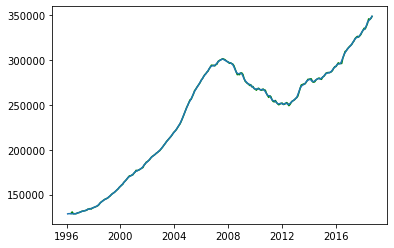

In [394]:
model7 = SARIMAX(endog = trainz, exog = exogz, order=(3, 2, 3), freq = 'M').fit()
y_hat_train = model7.predict(start = trainz.index[2], typ='levels')

fig, ax = plt.subplots()
ax.plot(y_hat_train[1:], color = 'g')
ax.plot(trainz);

In [395]:
y_hat_train

1996-03-31    128993.639050
1996-04-30    128923.909147
1996-05-31    130711.485211
1996-06-30    128839.671381
1996-07-31    128721.400851
                  ...      
2018-04-30    340419.873343
2018-05-31    345553.637221
2018-06-30    344839.342721
2018-07-31    346037.640078
2018-08-31    348268.218189
Freq: M, Length: 270, dtype: float64

In [396]:
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:     Zillow Home Value Index (ZHVI)   No. Observations:                  272
Model:                           SARIMAX(3, 2, 3)   Log Likelihood               -2129.577
Date:                            Mon, 19 Apr 2021   AIC                           4275.153
Time:                                    17:33:47   BIC                           4303.941
Sample:                                01-31-1996   HQIC                          4286.713
                                     - 08-31-2018                                         
Covariance Type:                              opg                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
financial_crisis_flag  -657.9998    278.605     -2.362      0.018   -1204.055    -111.945
ar.L1                     0.0236      0.452      0.052      0.958      -0.862       0.909
ar.L2                     0.2495      0.486      0.513      0.608      -0.703       1.202
ar.L3                    -0.0782      0.555     -0.141      0.888      -1.165       1.009
ma.L1                    -0.0316      0.462     -0.068      0.946      -0.937       0.874
ma.L2                    -0.2722      0.502     -0.542      0.588      -1.257       0.713
ma.L3                     0.0086      0.561      0.015      0.988      -1.091       1.109
sigma2                 3.089e+05   1.49e+04     20.755      0.000     2.8e+05    3.38e+05
===================================================================================
Ljung-Box (Q):                      145.41   Jarque-Bera (JB):                69.94
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.07   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

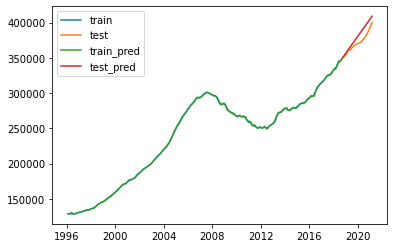

In [397]:
y_hat_test = model7.predict(start=testz.index[0], end=testz.index[-1],typ='levels', exog = np.zeros(len(testz)), dynamic = True)

fig, ax = plt.subplots()
ax.plot(trainz, label='train')
ax.plot(testz, label='test')
ax.plot(y_hat_train, label='train_pred')
ax.plot(y_hat_test, label='test_pred')

plt.legend();

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


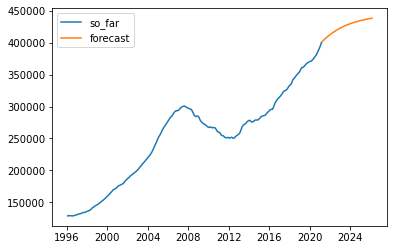

In [401]:
model7 = SARIMAX(zip_23226['Zillow Home Value Index (ZHVI)'], order=(3, 1, 3), exog = zip_23226['financial_crisis_flag'], freq = 'M').fit()
forecast = model7.forecast(steps=60, exog = np.zeros(60))

fig, ax = plt.subplots()

ax.plot(zip_23226['Zillow Home Value Index (ZHVI)'], label='so_far')
ax.plot(forecast, label='forecast')
# ax.set_title('Chicago Gun Crime Predictions\n One Year out')

plt.legend();

In [412]:
forecast

2021-03-31    401874.903897
2021-04-30    403297.950092
2021-05-31    404609.462937
2021-06-30    405861.036288
2021-07-31    407069.234418
                  ...      
2025-10-31    437497.172909
2025-11-30    437737.714853
2025-12-31    437970.911819
2026-01-31    438196.988086
2026-02-28    438416.161086
Freq: M, Length: 60, dtype: float64

In [404]:
(forecast[12] - zip_23226['Zillow Home Value Index (ZHVI)'][-1] ) / zip_23226['Zillow Home Value Index (ZHVI)'][-1]

0.038112138435820266

In [332]:
pd.set_option('display.max_rows', 10)
zip_23226['ROI'].rolling(12).mean().dropna()

1997-01-31    0.001593
1997-02-28    0.001675
1997-03-31    0.001883
1997-04-30    0.002037
1997-05-31    0.002259
                ...   
2020-10-31    0.003940
2020-11-30    0.004409
2020-12-31    0.004985
2021-01-31    0.005557
2021-02-28    0.006261
Name: ROI, Length: 290, dtype: float64

In [328]:

zip_23226['Zillow Home Value Index (ZHVI)']

1996-01-31    128590.0
1996-02-29    128784.0
1996-03-31    128804.0
1996-04-30    128854.0
1996-05-31    128799.0
1996-06-30    128513.0
1996-07-31    128595.0
1996-08-31    128700.0
1996-09-30    129266.0
1996-10-31    129563.0
1996-11-30    130041.0
1996-12-31    130507.0
1997-01-31    131067.0
1997-02-28    131393.0
1997-03-31    131742.0
1997-04-30    132036.0
1997-05-31    132332.0
1997-06-30    133082.0
1997-07-31    133495.0
1997-08-31    133997.0
1997-09-30    133972.0
1997-10-31    134497.0
1997-11-30    134957.0
1997-12-31    135494.0
1998-01-31    135962.0
1998-02-28    136522.0
1998-03-31    137140.0
1998-04-30    138042.0
1998-05-31    139406.0
1998-06-30    140691.0
1998-07-31    141739.0
1998-08-31    142756.0
1998-09-30    143735.0
1998-10-31    144487.0
1998-11-30    145128.0
1998-12-31    145822.0
1999-01-31    146753.0
1999-02-28    147699.0
1999-03-31    148895.0
1999-04-30    150050.0
1999-05-31    150998.0
1999-06-30    151918.0
1999-07-31    153035.0
1999-08-31 

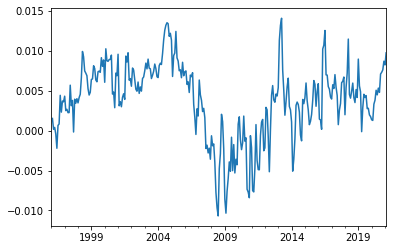

In [325]:
zip_23226['ROI'].plot()